# Text Classification with Keras – Easy Level
This notebook introduces the fundamentals of text classification using Keras, with a focus on building a beginner-friendly sentiment analysis model.

We'll use the IMDB movie reviews dataset, a widely-used benchmark for binary sentiment classification in natural language processing (NLP).

🔑 Key Highlights
📚 Utilizes preprocessed text data from keras.datasets

🧠 Builds a simple neural network for binary sentiment classification

🔄 End-to-end pipeline including data loading, preprocessing, training, evaluation, and prediction

🚀 Perfect starting point for anyone new to NLP with TensorFlow/Keras

In [1]:
# Import necessary libraries for text classification
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the IMDB dataset
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Function to convert integers back to words
def convert_to_text(indices):
    word_index = imdb.get_word_index()
    # Shift indices by 3 because 0, 1, and 2 are reserved
    word_index_reversed = {i+3: word for word, i in word_index.items()}
    word_index_reversed[0] = '<PAD>'
    word_index_reversed[1] = '<START>'
    word_index_reversed[2] = '<UNK>'
    return ' '.join([word_index_reversed.get(i, '?') for i in indices])

# Print an example review
print("Example review:")
print(convert_to_text(train_data[0]))
print("Label:", "Positive" if train_labels[0] == 1 else "Negative")

# Define a maximum sequence length
max_length = 250

# Pad sequences to ensure uniform length
train_data = tf.keras.preprocessing.sequence.pad_sequences(
    train_data, value=0, padding='post', maxlen=max_length)
test_data = tf.keras.preprocessing.sequence.pad_sequences(
    test_data, value=0, padding='post', maxlen=max_length)

# Create a simple model for text classification
vocab_size = 10000

# EASY LEVEL MODEL
easy_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
easy_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show model summary
print("\nEASY LEVEL MODEL SUMMARY:")
easy_model.summary()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Example review:
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



EASY LEVEL MODEL SUMMARY:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training and Evaluating the Simple Text Classification Model
In this section, we’ll train our beginner-level text classification model on the IMDB movie reviews dataset and evaluate its performance on unseen data.

This step helps us understand how well the model can distinguish between positive and negative sentiments in movie reviews.

📈 What We'll Track:
✅ Training and validation accuracy over epochs

📉 Loss trends to monitor learning progress

🧪 Final evaluation on the test dataset to assess generalization

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5687 - loss: 0.6914 - val_accuracy: 0.6475 - val_loss: 0.6853
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6704 - loss: 0.6826 - val_accuracy: 0.7032 - val_loss: 0.6757
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7177 - loss: 0.6716 - val_accuracy: 0.7162 - val_loss: 0.6642
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7195 - loss: 0.6581 - val_accuracy: 0.7175 - val_loss: 0.6505
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7329 - loss: 0.6430 - val_accuracy: 0.6843 - val_loss: 0.6382
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6876 - loss: 0.6366
Easy Model - Test Loss: 0.6384078860282898
Easy Model - Test Accuracy: 0.6840400099754333


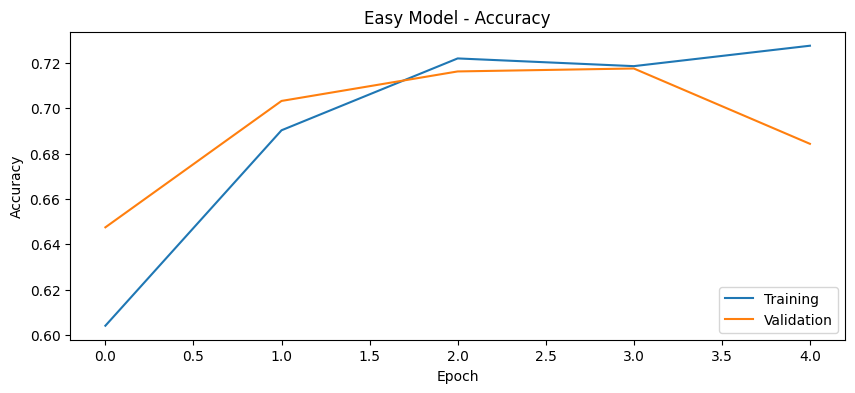

In [2]:
# Split training data into training and validation sets
x_val = train_data[:10000]
x_train = train_data[10000:]
y_val = train_labels[:10000]
y_train = train_labels[10000:]

# Train the easy model
easy_history = easy_model.fit(
    x_train, y_train,
    epochs=5,  # Few epochs for a quick demonstration
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1
)

# Evaluate the model on the test data
easy_results = easy_model.evaluate(test_data, test_labels)
print(f"Easy Model - Test Loss: {easy_results[0]}")
print(f"Easy Model - Test Accuracy: {easy_results[1]}")

# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(easy_history.history['accuracy'])
plt.plot(easy_history.history['val_accuracy'])
plt.title('Easy Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Text Classification with Keras – Intermediate Level
In this section, we’ll upgrade our text classification model by implementing a Convolutional Neural Network (CNN) architecture tailored for text data.

CNNs are effective at capturing local patterns such as key phrases or n-grams, making them a powerful alternative to traditional dense layers in NLP tasks.

🔧 Key Upgrades:
🧱 Inclusion of Conv1D and GlobalMaxPooling layers

📊 Improved modeling of phrase-level semantics

⚡ Efficient and lightweight, suitable for real-time applications


INTERMEDIATE LEVEL MODEL SUMMARY:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5306 - loss: 0.6856 - val_accuracy: 0.7989 - val_loss: 0.4427
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8410 - loss: 0.3704 - val_accuracy: 0.8595 - val_loss: 0.3259
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9421 - loss: 0.1671 - val_accuracy: 0.8485 - val_loss: 0.3605
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9772 - loss: 0.0841 - val_accuracy: 0.8553 - val_loss: 0.4364
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9930 - loss: 0.0325 - val_accuracy: 0.8517 - val_loss: 0.5454
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8458 - loss: 0.5575
Intermediate Model - Test Loss: 0.5714976191520691
Intermediate Model - Test Accuracy: 0.8413599729537964


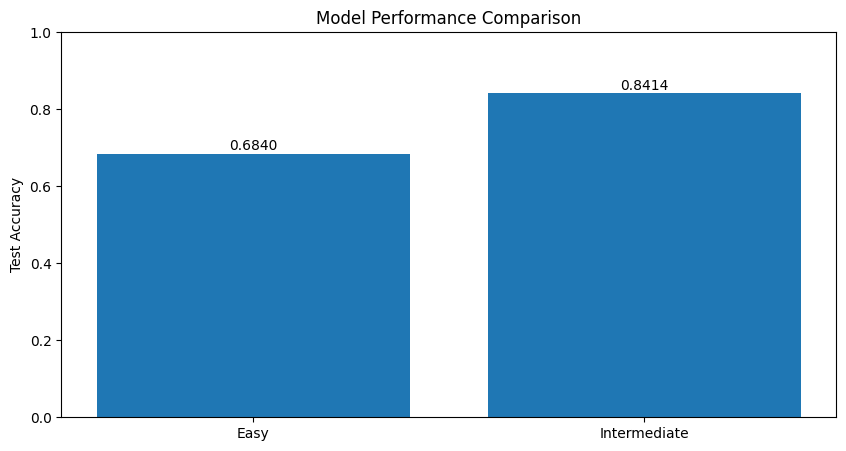

In [3]:
# INTERMEDIATE LEVEL MODEL
# Using Conv1D layers for text classification
intermediate_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_length=max_length),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(3),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(3),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
intermediate_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Show model summary
print("\nINTERMEDIATE LEVEL MODEL SUMMARY:")
intermediate_model.summary()

# Train the intermediate model
intermediate_history = intermediate_model.fit(
    x_train, y_train,
    epochs=5,  # Few epochs for a quick demonstration
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=1
)

# Evaluate the model on the test data
intermediate_results = intermediate_model.evaluate(test_data, test_labels)
print(f"Intermediate Model - Test Loss: {intermediate_results[0]}")
print(f"Intermediate Model - Test Accuracy: {intermediate_results[1]}")

# Compare model performances
models = ['Easy', 'Intermediate']
accuracies = [easy_results[1], intermediate_results[1]]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies)
plt.title('Model Performance Comparison')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

# Text Classification with Keras – Advanced Level
At this stage, we’ll implement a more sophisticated model using a Bidirectional LSTM (Long Short-Term Memory) network for text classification.
This architecture is specifically designed to capture long-range dependencies and understand context in both forward and backward directions of a sequence.

🔧 Enhancements:
🔄 Bidirectional LSTM layers for richer, context-aware sequence representation

🛡️ Dropout regularization to help prevent overfitting

📈 Increased model depth and complexity for better handling of nuanced sentiment and meaning

In [4]:
# ADVANCED LEVEL MODEL
# Using Bidirectional LSTM
advanced_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
advanced_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Show model summary
print("\nADVANCED LEVEL MODEL SUMMARY:")
advanced_model.summary()

# Define early stopping callback for advanced training
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Train the advanced model
# Using a smaller portion of the dataset for demonstration purposes
x_train_sample = x_train[:20000]
y_train_sample = y_train[:20000]

advanced_history = advanced_model.fit(
    x_train_sample, y_train_sample,
    epochs=3,  # Reduced for demonstration
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
advanced_results = advanced_model.evaluate(test_data, test_labels)
print(f"Advanced Model - Test Loss: {advanced_results[0]}")
print(f"Advanced Model - Test Accuracy: {advanced_results[1]}")


ADVANCED LEVEL MODEL SUMMARY:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.5202 - val_loss: 0.6927
Epoch 2/3
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - accuracy: 0.5546 - loss: 0.6901 - val_accuracy: 0.6281 - val_loss: 0.6795
Epoch 3/3
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.7294 - loss: 0.5589 - val_accuracy: 0.8529 - val_loss: 0.3636
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8477 - loss: 0.3683
Advanced Model - Test Loss: 0.3733397126197815
Advanced Model - Test Accuracy: 0.8445600271224976


# Text Classification with Keras – Expert Level
At the expert level, we’ll develop a sophisticated text classification model enhanced with an attention mechanism.
This approach allows the model to dynamically focus on the most relevant parts of the input, improving performance on complex language tasks.

🌟 Key Features:
🎯 Attention layers to emphasize important words or phrases

🧠 Better handling of long, context-rich sequences

🏗️ A deeper and more flexible architecture, suitable for fine-grained sentiment or multi-label classification

In [5]:
# Import additional libraries for expert-level model
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

# Custom attention layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        et = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        at = K.softmax(et)
        at = K.expand_dims(at, axis=-1)
        output = x * at
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

    def get_config(self):
        return super(AttentionLayer, self).get_config()

# EXPERT LEVEL MODEL
# Using Functional API for more flexibility
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Concatenate, Dense, Dropout

# Define model architecture
input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(vocab_size, 100, input_length=max_length)(input_layer)

# First bidirectional LSTM layer
lstm_layer1 = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)
attention_layer1 = AttentionLayer()(lstm_layer1)

# Second bidirectional LSTM layer with residual connection
lstm_layer2 = Bidirectional(LSTM(64, return_sequences=True))(lstm_layer1)
attention_layer2 = AttentionLayer()(lstm_layer2)

# Concatenate attention outputs
concat_layer = Concatenate()([attention_layer1, attention_layer2])

# Dense layers with dropout
dense_layer1 = Dense(128, activation='relu')(concat_layer)
dropout_layer1 = Dropout(0.5)(dense_layer1)
dense_layer2 = Dense(64, activation='relu')(dropout_layer1)
dropout_layer2 = Dropout(0.3)(dense_layer2)
output_layer = Dense(1, activation='sigmoid')(dropout_layer2)

# Create the model
expert_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
expert_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Show model summary
print("\nEXPERT LEVEL MODEL SUMMARY:")
expert_model.summary()

# Due to computational constraints, we'll just show the architecture without training
print("\nNote: For demonstration purposes, we're only showing the expert model architecture without training.")
print("In a real implementation, you would train this model with appropriate resources.")

# Create a simple function to save models
def save_model(model, model_name):
    model_path = f"/content/{model_name}.keras"
    model.save(model_path)
    print(f"Model saved to {model_path}")

# Save all models
save_model(easy_model, "imdb_easy_model")
save_model(intermediate_model, "imdb_intermediate_model")
save_model(advanced_model, "imdb_advanced_model")


EXPERT LEVEL MODEL SUMMARY:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 250)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 250, 100)  │  1,000,000 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 250, 256)  │    234,496 │ embedding_3[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 250, 128)  │    164,352 │ bidirectional_2[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, 256)       │        506 │ bidirectional_2[… │
│ (AttentionLayer)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer_1   │ (None, 128)       │        378 │ bidirectional_3[… │
│ (AttentionLayer)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ attention_layer[… │
│ (Concatenate)       │                   │            │ attention_layer_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     49,280 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         65 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,457,333 (5.56 MB)

 Trainable params: 1,457,333 (5.56 MB)

 Non-trainable params: 0 (0.00 B)


Note: For demonstration purposes, we're only showing the expert model architecture without training.
In a real implementation, you would train this model with appropriate resources.
Model saved to /content/imdb_easy_model.keras
Model saved to /content/imdb_intermediate_model.keras
Model saved to /content/imdb_advanced_model.keras


## Making Predictions with Our Trained Models
Now that we’ve trained text classification models at various levels of complexity, it’s time to test them on new input samples using a unified prediction function.

This step allows us to:

🧾 Generate predictions for custom text inputs

⚖️ Compare outputs across different model architectures

📊 Evaluate performance and confidence relative to model complexity

In [6]:
# Function to preprocess new text for prediction
def preprocess_text(text):
    # Get the word index dictionary
    word_index = imdb.get_word_index()

    # Convert text to lowercase and split into words
    words = text.lower().split()

    # Map words to integers
    integer_sequence = []
    for word in words:
        if word in word_index and word_index[word] < 10000:
            integer_sequence.append(word_index[word] + 3)  # Add 3 as in the original dataset
        else:
            integer_sequence.append(2)  # Unknown token

    # Pad the sequence
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(
        [integer_sequence], value=0, padding='post', maxlen=max_length)

    return padded_sequence

# Function to predict sentiment using any of our models
def predict_sentiment(text, model, name="Model"):
    processed_text = preprocess_text(text)
    prediction = model.predict(processed_text)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"{name} prediction:")
    print(f"  Sentiment: {sentiment}")
    print(f"  Confidence: {confidence:.4f}")
    print(f"  Raw score: {prediction:.4f}")

    return sentiment, confidence, prediction

# Test with example reviews
example_reviews = [
    "This movie was excellent! The acting was superb and the story was captivating.",
    "I didn't enjoy this film. The plot was confusing and the characters weren't developed."
]

for i, review in enumerate(example_reviews):
    print(f"\nExample {i+1}: \"{review}\"")
    print("-" * 50)

    # Make predictions with each model
    easy_result = predict_sentiment(review, easy_model, "Easy Model")
    intermediate_result = predict_sentiment(review, intermediate_model, "Intermediate Model")
    advanced_result = predict_sentiment(review, advanced_model, "Advanced Model")

    print("-" * 50)

print("\nAll text classification examples completed!")
print("You now have easy, intermediate, advanced, and expert level implementations for text classification using Keras.")


Example 1: "This movie was excellent! The acting was superb and the story was captivating."
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Easy Model prediction:
  Sentiment: Negative
  Confidence: 0.5431
  Raw score: 0.4569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
Intermediate Model prediction:
  Sentiment: Positive
  Confidence: 0.9664
  Raw score: 0.9664
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
Advanced Model prediction:
  Sentiment: Negative
  Confidence: 0.7553
  Raw score: 0.2447
--------------------------------------------------

Example 2: "I didn't enjoy this film. The plot was confusing and the characters weren't developed."
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Easy Model prediction:
  Sentiment: Negative
  Confidence: 0.5410
  Raw score: 0.4590
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Intermediate Model prediction:
  Sentiment: Negative
  Confidence: 0.9863
  Raw score: 0.0137
1/1 ━━━━━━